In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>"""
)

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100


In [3]:
data = pd.read_csv('./Data/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable for Age is 714 which is less than the total, there are missing values in the Age column.

We can replace the null values with the median which is more robust to outliers than the mean.

In [6]:
data['Age'].fillna(data['Age'].median(), inplace = True)

Ok, that is done. Let's do a describe.

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Wooho!! 

## Exploratory Data Analysis

First, survival based on gender.

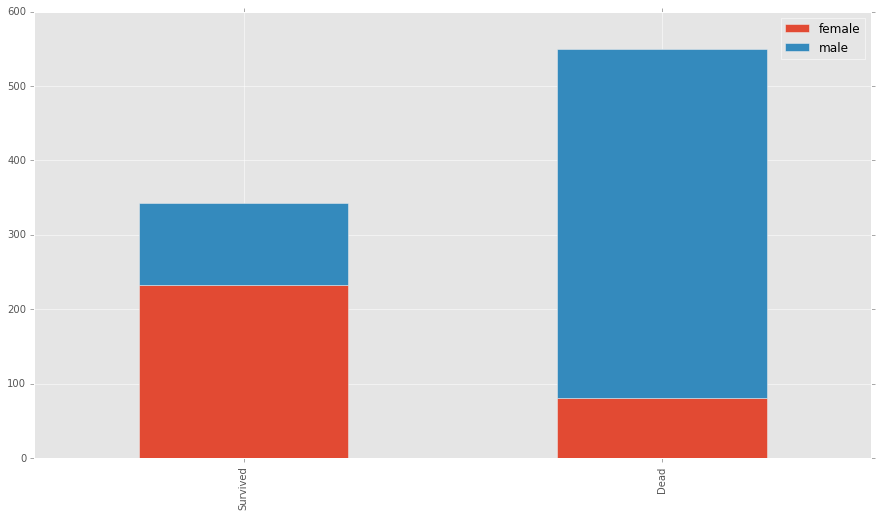

In [8]:
survived_sex = data[data['Survived'] == 1]['Sex'].value_counts()
dead_sex = data[data['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived','Dead']
df.plot(kind = 'bar',stacked = True,figsize=(15,8))

Women are more likely to survive. 

### Correlations

**Survival vs. Age**

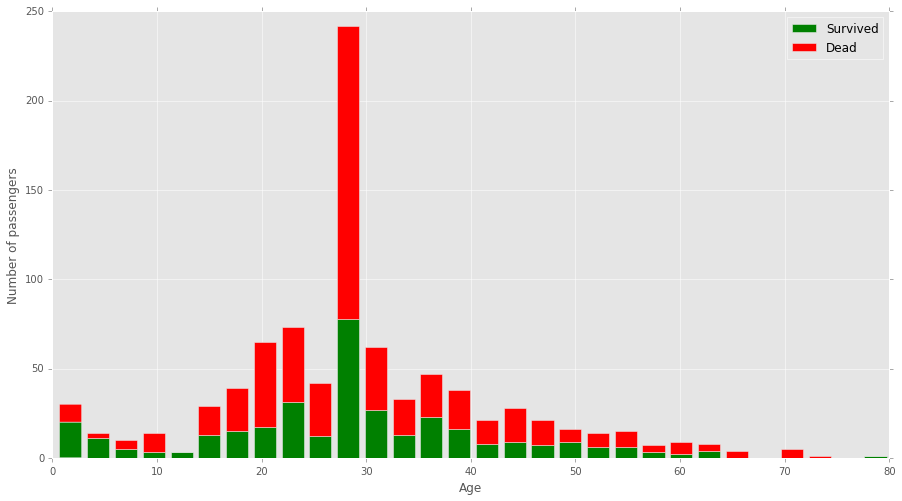

In [9]:
figure = plt.figure(figsize = (15,8))
plt.hist([data[data['Survived'] == 1]['Age']
          ,data[data['Survived']==0]['Age']], stacked = True
         , color = ['g','r'], bins = 30, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

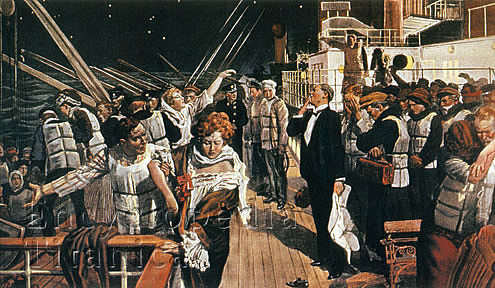

In [10]:
from IPython.display import Image
Image('./Images/titanic-sinking-lifeboats1.jpg'
      ,height = 1000, width = 1000)

**Fare Ticket vs Survival**

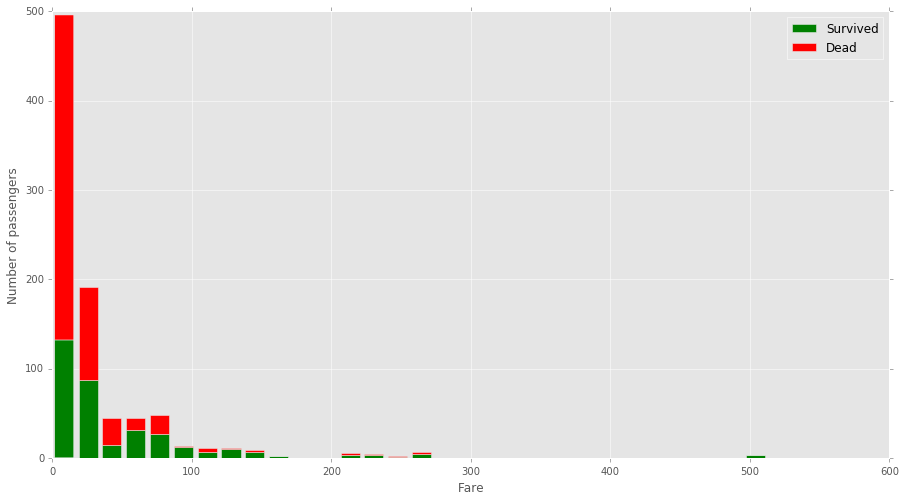

In [11]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived'] == 1]['Fare'], 
          data[data['Survived'] == 0]['Fare']
         ]
        ,stacked = True, color = ['g','r'],bins = 30,label = ['Survived'
                                                              ,'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Passengers with cheaper ticket fares are more likely to die. Expensive ticket buyers may have higher social status and seem to be rescued first.

**Combining Age, Fare and Survival on a single chart**

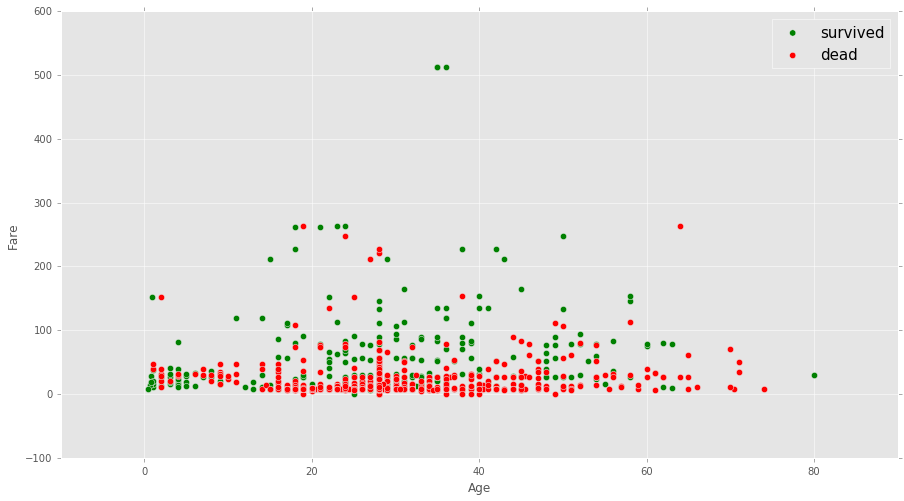

In [12]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived'] == 1]['Age'],
           data[data['Survived'] == 1]['Fare'], c = 'green',s = 40)
ax.scatter(data[data['Survived'] == 0]['Age'],
           data[data['Survived'] == 0]['Fare'],c = 'red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc = 'upper right',fontsize = 15)

There's a cluster of dead passengers they seem to be in an age group of 15-50 of lower class.

**Ticket fares vs. Passenger Class**

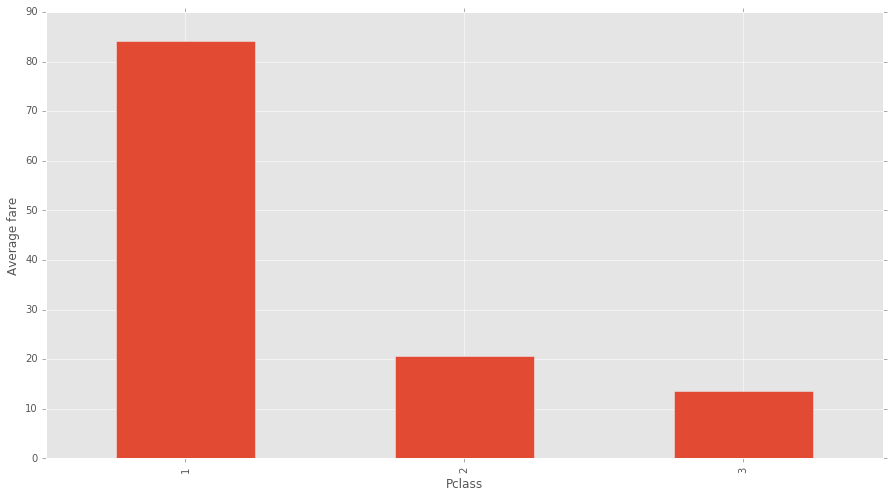

In [13]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind = 'bar'
                                           , figsize=(15,8),ax = ax)


Let's now see how embarkation site affected the survival.

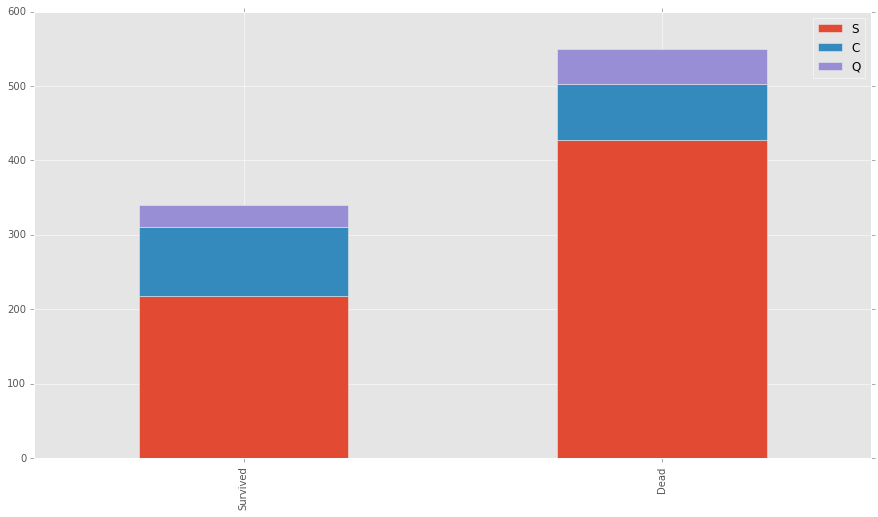

In [14]:
survived_embark = data[data['Survived'] == 1]['Embarked'].value_counts()
dead_embark = data[data['Survived'] == 0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind = 'bar',stacked = True, figsize = (15,8))

** Feature Engineering **

Let's define a print function that asserts whether or not a feature has been processed.

In [15]:
def status(feature):
    print("Processing", feature,' : ok')

**Loading the data**

The trick of starting a machine learning problem is to combine the training set and the test set together. A useful technique especially when your test appears to have a feature that does not exist in the training set. Therefore, if we don't combine the two sets, testing our model will fail.

In [16]:
def get_combined_data():
    train = pd.read_csv("./Data/train.csv")
    test = pd.read_csv("./Data/test.csv")
    
    # Extract the targets and then remove from training data.
    targets = train.Survived
    train.drop('Survived',1,inplace = True)
    
    #merging train and test data for feature engineering.
    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop('index',inplace=True, axis=1)
    
    return combined

In [17]:
combined = get_combined_data()

In [18]:
combined.shape

(1309, 11)

In [19]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Extracting the passenger titles**

The reason why this is very interesting that some passengers will have Mr or Mrs. or Miss, it sometime we may have Master or Dona, which might be a some additional information about the social status.

In [20]:
def get_titles():
    global combined
    
    #we extract the titles from each name
    combined['Title'] = combined['Name'].map(
        lambda name: name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
        "Capt": "Officer",
        "Col" : "Officer",
        "Major" : "Officer",
        "Jonkheer" : "Royalty",
        "Don" : "Royality",
        "Sir" : "Royalty",
        "Dr" : "Officer",
        "Rev" : "Officer",
        "the Countess" : "Royality",
        "Mme" : "Mrs",
        "Mlle" : "Miss",
        "Ms" : "Miss",
        "Mr" : "Mr",
        "Mrs" : "Mrs",
        "Miss" : "Miss",
        "Master" : "Master",
        "Lady" : "Lady"
    }
    
    combined["Title"] = combined.Title.map(Title_Dictionary)

In [21]:
get_titles()

In [22]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Now we have an additional column called title that contains information.

**Processing the ages**

We have seen that the age variable had 177 values. That is almost 13% of the dataset. Imputation is not a best solution since age may diffe by groups and categories of passangers.

Let's group the dataset by sex, Title and passenger class and for each subset compute the median age.

In [23]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                              
female 1      Lady            557.0  48.0    1.0    0.0   39.6000
              Miss            529.5  30.0    0.0    0.0   99.9625
              Mrs             853.5  45.0    1.0    0.0   78.1125
              Officer         797.0  49.0    0.0    0.0   25.9292
              Royality        760.0  33.0    0.0    0.0   86.5000
       2      Miss            597.0  20.0    0.0    0.0   19.5000
              Mrs             547.0  30.5    1.0    0.0   26.0000
       3      Miss            613.0  18.0    0.0    0.0    8.0500
              Mrs             658.0  31.0    1.0    1.0   15.5000
male   1      Master          803.0   6.0    1.0    2.0  134.5000
              Mr              634.0  41.5    0.0    0.0   47.1000
              Officer         678.0  52.0    0.0    0.0   37.5500
              Royality         31.0  40.0    0.0    0.0   27.7208
              Royalty         711.5  43.5    0.5    0.0   28.4646
       2      Master          550.0   2.0    1.0    1.0   26.0000
              Mr              723.5  30.0    0.0    0.0   13.0000
              Officer         513.0  41.5    0.0    0.0   13.0000
       3      Master          789.0   6.0    3.0    1.0   22.3583
              Mr              640.5  26.0    0.0    0.0    7.8958

Look at the median age column and see how this value can be different based on Sex, Pclass and Title put together.

Now let's create a function that fills in missing age in combined based on these different attributes.

In [27]:
def process_age():
    global combined
    
    # Function fills the missing values of the Age variable.
    
    def fillAges(row):
        if row['Sex'] == 'female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39
            
        elif row['Sex'] == 'female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30
            
        elif row['Sex'] == 'female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31
                
        elif row['Sex'] == 'male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40
            
        elif row['Sex'] == 'male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5
            
        elif row['Sex'] == 'male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
            
    combined.Age = combined.apply(
    lambda r : fillAges(r) 
    if np.isnan(r['Age'])
    else r['Age'], axis =1)
    
    status('age')
    
            
    

In [28]:
process_age()

Processing age  : ok


In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1308 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


Now as we have replaced missing ages. We notice that fare has a missing value , two missing values in Embarked and lots in cabin.

In [31]:
def process_names():
    global combined
    
    #we clean the Name variable
    combined.drop('Name', axis = 1, inplace=True)
    
    #encoding in dummy variable
    title_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,title_dummies], axis=1)
    
    #removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')

This function drops the name column since we won't be using it anymore because we created a Title column.

Then we encode the title values using a dummy encoding.

In [33]:
process_names()

Processing names  : ok


In [34]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royality,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As you can see:
   * there is no longer a name feature.
   * new variable(Title_X) appeared. These features are binary.
       * For example if Title_Mr = 1, the corresponding Title is Mr.

**Processing Fare**

In [35]:
def process_fares():
    global combined
    
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.Fare.mean(), inplace = True)
    status('fare')

This function replaces one missing Fare value by the mean.

In [37]:
process_fares()

Processing fare  : ok


**Processing Embarked**

In [38]:
def process_embarked():
    global combined
    
    # filling the missing embarked values with most frequent ones.
    combined.Embarked.fillna('S', inplace = True)
    
    #dummy encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'],
                                      prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1, inplace=True)
    status('embarked')

This functions replaces the two missing values of embarked with most frequent Embarked value.

In [39]:
process_embarked()

Processing embarked  : ok


**Processign Pclass**

In [41]:
def process_pclass():
    global combined
    
    #encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix = 'Pclass')
    
    #adding dummy variables
    combined = pd.concat([combined, pclass_dummies], axis = 1)
    
    # removing "Pclass"
    
    combined.drop('Pclass', axis=1, inplace = True)
    
    status('pclass')

The function encodes the values of Pclass (1,2,3) using a dummy encoding.

In [42]:
process_pclass()

Processing pclass  : ok


**Processing Ticket**

In [43]:
def process_ticket():
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if 
    # no prefix (i.e. tht ticket is a digit)
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(),ticket)
        ticket = filter(lambda t : not t.isdigit(),ticket)
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
        
    # Extracting dummy variable from tickets:
    
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis = 1)
    combined.drop('Ticket',inplace=True, axis = 1)
    status('ticket')